# A short tutorial on the `BasisSet` class

`BasisSet` class provides a handy abstraction for storing and manipulating orbitals [basis sets](https://en.wikipedia.org/wiki/Basis_set_%28chemistry%29) used in quantum chemistry.

## Quick overview

The `BasisSet` requires some basic information
- ``name``: name of the basis set as string,  
- ``element``: symbol or name of the element, 
- ``functions``: actual functions in terms of exponents and contraction coeffcients.


Internally the ``functions`` attribute is a dictionary with shell labels `s`, `p`, `d`, etc. as keys. A nested dictionary for each shell stores a [numpy array] array with exponents under key ``e`` and a list of contracted functions where each item is a [numpy array] with a custom `dtype` storing exponent indices (`idx`) and contraction coefficients (`cc`) of the functions. As an example consider the following structure:

    {'s' : {'e'  : numpy.array([exp0, exp1, exp2, ...]),
            'cf' : [
                    numpy.array([(i00, c00), (i01, c01), (i02, c02) ...], dtype=[('idx', '<i4'), ('cc', '<f8')]),
                    numpy.array([(i10, c10), (i11, c11), (i12, c12) ...], dtype=[('idx', '<i4'), ('cc', '<f8')]),
                    ...
                    ]
            }
     'p' : {'e'  : numpy.array([exp0, exp1, exp2, ...]),
            'cf' : [
                    numpy.array([(i00, c00), (i01, c01), (i02, c02) ...], dtype=[('idx', '<i4'), ('cc', '<f8')]),
                    numpy.array([(i10, c10), (i11, c11), (i12, c12) ...], dtype=[('idx', '<i4'), ('cc', '<f8')]),
                    ...
                    ]
            }
      ...
    }

[numpy array]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html

## Parsing basis sets

At present `BasisSet` can be created from the following code formats (see below for examples):

- [Molpro](https://www.molpro.net/)
- [Gamess(US)](http://www.msg.ameslab.gov/gamess/)
- [Gaussian](http://www.gaussian.com/)

The basis sets can e parsed from string or from files. Here only the `from_string` will be shown but the `from_file` method has the same call sigantre with first argument being the file name.

However `BasisSet` can also be serialized into JSON and pickle formats.

- [JSON](https://docs.python.org/3.6/library/json.html)
- [pickle](https://docs.python.org/3.6/library/pickle.html)



### *cc-pvdz* basis for Be in molpro format

In [1]:
mpstr = '''basis={
!
! BERYLLIUM       (9s,4p,1d) -> [3s,2p,1d]
! BERYLLIUM       (9s,4p,1d) -> [3s,2p,1d]
s, BE , 2940.0000000, 441.2000000, 100.5000000, 28.4300000, 9.1690000, 3.1960000, 1.1590000, 0.1811000, 0.0589000
c, 1.8, 0.0006800, 0.0052360, 0.0266060, 0.0999930, 0.2697020, 0.4514690, 0.2950740, 0.0125870
c, 1.8, -0.0001230, -0.0009660, -0.0048310, -0.0193140, -0.0532800, -0.1207230, -0.1334350, 0.5307670
c, 9.9, 1
p, BE , 3.6190000, 0.7110000, 0.1951000, 0.0601800
c, 1.3, 0.0291110, 0.1693650, 0.5134580
c, 4.4, 1
d, BE , 0.2380000
c, 1.1, 1
}'''

In [2]:
from chemtools.basisset import BasisSet, merge

Construct a `BasisSet` instance from string

In [3]:
pvdz = BasisSet.from_str(mpstr, fmt='molpro', name='cc-pvdz')

In [4]:
print(pvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1     2940.0000000000     0.00068000    -0.00012300
    2      441.2000000000     0.00523600    -0.00096600
    3      100.5000000000     0.02660600    -0.00483100
    4       28.4300000000     0.09999300    -0.01931400
    5        9.1690000000     0.26970200    -0.05328000
    6        3.1960000000     0.45146900    -0.12072300
    7        1.1590000000     0.29507400    -0.13343500
    8        0.1811000000     0.01258700     0.53076700
Uncontracted:
    9        0.0589000000     1.00000000

================p shell=================
Contracted:
    1        3.6190000000     0.02911100
    2        0.7110000000     0.16936500
    3        0.1951000000     0.51345800
Uncontracted:
    4        0.0601800000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1

### *cc-pvdz* basis for Be in Gaussian format

In [5]:
gaustr = '''****
Be     0 
S   8   1.00
   2940.0000000              0.0006800        
    441.2000000              0.0052360        
    100.5000000              0.0266060        
     28.4300000              0.0999930        
      9.1690000              0.2697020        
      3.1960000              0.4514690        
      1.1590000              0.2950740        
      0.1811000              0.0125870        
S   8   1.00
   2940.0000000             -0.0001230        
    441.2000000             -0.0009660        
    100.5000000             -0.0048310        
     28.4300000             -0.0193140        
      9.1690000             -0.0532800        
      3.1960000             -0.1207230        
      1.1590000             -0.1334350        
      0.1811000              0.5307670        
S   1   1.00
      0.0589000              1.0000000        
P   3   1.00
      3.6190000              0.0291110        
      0.7110000              0.1693650        
      0.1951000              0.5134580        
P   1   1.00
      0.0601800              1.0000000        
D   1   1.00
      0.2380000              1.0000000        
****'''

In [6]:
gaupvdz = BasisSet.from_str(gaustr, fmt='gaussian', name='cc-pvdz')

In [7]:
print(gaupvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1     2940.0000000000     0.00068000    -0.00012300
    2      441.2000000000     0.00523600    -0.00096600
    3      100.5000000000     0.02660600    -0.00483100
    4       28.4300000000     0.09999300    -0.01931400
    5        9.1690000000     0.26970200    -0.05328000
    6        3.1960000000     0.45146900    -0.12072300
    7        1.1590000000     0.29507400    -0.13343500
    8        0.1811000000     0.01258700     0.53076700
Uncontracted:
    9        0.0589000000     1.00000000

================p shell=================
Contracted:
    1        3.6190000000     0.02911100
    2        0.7110000000     0.16936500
    3        0.1951000000     0.51345800
Uncontracted:
    4        0.0601800000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1

### *cc-pvdz* for Be in Gamess(US) format

In [8]:
gamstr = '''$DATA
BERYLLIUM
S   8
  1   2940.0000000              0.0006800        
  2    441.2000000              0.0052360        
  3    100.5000000              0.0266060        
  4     28.4300000              0.0999930        
  5      9.1690000              0.2697020        
  6      3.1960000              0.4514690        
  7      1.1590000              0.2950740        
  8      0.1811000              0.0125870        
S   8
  1   2940.0000000             -0.0001230        
  2    441.2000000             -0.0009660        
  3    100.5000000             -0.0048310        
  4     28.4300000             -0.0193140        
  5      9.1690000             -0.0532800        
  6      3.1960000             -0.1207230        
  7      1.1590000             -0.1334350        
  8      0.1811000              0.5307670        
S   1
  1      0.0589000              1.0000000        
P   3
  1      3.6190000              0.0291110        
  2      0.7110000              0.1693650        
  3      0.1951000              0.5134580        
P   1
  1      0.0601800              1.0000000        
D   1
  1      0.2380000              1.0000000        
$END
'''

In [9]:
gampvdz = BasisSet.from_str(gamstr, fmt='gamessus', name='cc-pvdz') 

In [10]:
print(gampvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1     2940.0000000000     0.00068000    -0.00012300
    2      441.2000000000     0.00523600    -0.00096600
    3      100.5000000000     0.02660600    -0.00483100
    4       28.4300000000     0.09999300    -0.01931400
    5        9.1690000000     0.26970200    -0.05328000
    6        3.1960000000     0.45146900    -0.12072300
    7        1.1590000000     0.29507400    -0.13343500
    8        0.1811000000     0.01258700     0.53076700
Uncontracted:
    9        0.0589000000     1.00000000

================p shell=================
Contracted:
    1        3.6190000000     0.02911100
    2        0.7110000000     0.16936500
    3        0.1951000000     0.51345800
Uncontracted:
    4        0.0601800000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1

### Basis sets for multiple elements

If basis sets for multiple elements are given in the format compatible with [EMSL BSE](https://bse.pnl.gov/bse/portal) the parser returns a dictionary with element symbols as keys and `BasisSet` objects as values. For example below is the cc-pCVDZ basis set string in molpro format for Be, Mg, Ca as downloaded from EMSL. Remaining Gamess(US) and Gaussian formats can be parsed analogously. 

In [11]:
multi = '''
basis={
!
! BERYLLIUM       (10s,5p,1d) -> [4s,3p,1d]
! BERYLLIUM       (9s,4p,1d) -> [3s,2p,1d]
! BERYLLIUM       (1s,1p)
s, BE , 2940.0000000, 441.2000000, 100.5000000, 28.4300000, 9.1690000, 3.1960000, 1.1590000, 0.1811000, 0.0589000, 1.8600000
c, 1.8, 0.0006800, 0.0052360, 0.0266060, 0.0999930, 0.2697020, 0.4514690, 0.2950740, 0.0125870
c, 1.8, -0.0001230, -0.0009660, -0.0048310, -0.0193140, -0.0532800, -0.1207230, -0.1334350, 0.5307670
c, 9.9, 1
c, 10.10, 1
p, BE , 3.6190000, 0.7110000, 0.1951000, 0.0601800, 6.1630000
c, 1.3, 0.0291110, 0.1693650, 0.5134580
c, 4.4, 1
c, 5.5, 1
d, BE , 0.2380000
c, 1.1, 1
! MAGNESIUM       (13s,9p,2d) -> [5s,4p,2d]
! MAGNESIUM       (12s,8p,1d) -> [4s,3p,1d]
! MAGNESIUM       (1s,1p,1d)
s, MG , 47390.0000000, 7108.0000000, 1618.0000000, 458.4000000, 149.3000000, 53.5900000, 20.7000000, 8.3840000, 2.5420000, 0.8787000, 0.1077000, 0.0399900, 3.4220000
c, 1.11, 0.346023D-03, 0.268077D-02, 0.138367D-01, 0.551767D-01, 0.169660D+00, 0.364703D+00, 0.406856D+00, 0.135089D+00, 0.490884D-02, 0.286460D-03, 0.264590D-04
c, 1.11, -0.877839D-04, -0.674725D-03, -0.355603D-02, -0.142154D-01, -0.476748D-01, -0.114892D+00, -0.200676D+00, -0.341224D-01, 0.570454D+00, 0.542309D+00, 0.218128D-01
c, 1.11, 0.169628D-04, 0.129865D-03, 0.688831D-03, 0.273533D-02, 0.931224D-02, 0.223265D-01, 0.411195D-01, 0.545642D-02, -0.134012D+00, -0.256176D+00, 0.605856D+00
c, 12.12, 1
c, 13.13, 1
p, MG , 179.9000000, 42.1400000, 13.1300000, 4.6280000, 1.6700000, 0.5857000, 0.1311000, 0.0411200, 8.2790000
c, 1.7, 0.538161D-02, 0.392418D-01, 0.157445D+00, 0.358535D+00, 0.457226D+00, 0.215918D+00, 0.664948D-02
c, 1.7, -0.865948D-03, -0.615978D-02, -0.261519D-01, -0.570647D-01, -0.873906D-01, -0.122990D-01, 0.502085D+00
c, 8.8, 1
c, 9.9, 1
d, MG , 0.1870000, 3.7040000
c, 1.1, 1
c, 2.2, 1
! CALCIUM       (15s,12p,6d) -> [6s,5p,3d]
! CALCIUM       (14s,11p,5d) -> [5s,4p,2d]
! CALCIUM       (1s,1p,1d)
s, CA , 190000.7000000, 28481.4600000, 6482.7010000, 1835.8910000, 598.7243000, 215.8841000, 84.0124200, 34.2248800, 10.0249700, 4.0559200, 1.0202610, 0.4268650, 0.0633470, 0.0263010, 1.1143000
c, 1.13, 0.00022145, 0.00171830, 0.00892348, 0.03630183, 0.11762223, 0.28604352, 0.42260708, 0.25774366, 0.02391893, -0.00495218, 0.00171779, -0.00089209, 0.00024510
c, 1.13, -0.00006453, -0.00049662, -0.00262826, -0.01066845, -0.03713509, -0.09804284, -0.20342692, -0.15244655, 0.48279406, 0.62923839, 0.06164842, -0.01479971, 0.00361089
c, 1.13, 0.00002223, 0.00017170, 0.00090452, 0.00370343, 0.01283750, 0.03475459, 0.07303491, 0.06100083, -0.24292928, -0.48708500, 0.56502804, 0.65574386, 0.02672894
c, 1.13, 0.00000531, 0.00004111, 0.00021568, 0.00088827, 0.00305813, 0.00837608, 0.01741056, 0.01515453, -0.06207919, -0.12611803, 0.17360694, 0.37822943, -0.65964698
c, 14.14, 1
c, 15.15, 1
p, CA , 1072.0430000, 253.8439000, 81.3162600, 30.2418300, 12.1011000, 5.0225540, 1.9092200, 0.7713040, 0.3005700, 0.0766490, 0.0277720, 1.5101000
c, 1.10, 0.00198166, 0.01612944, 0.07657851, 0.23269594, 0.42445210, 0.37326402, 0.07868530, -0.00599927, 0.00264257, -0.00085694
c, 1.10, -0.00064891, -0.00527907, -0.02581131, -0.08062892, -0.15846552, -0.12816816, 0.25610103, 0.58724068, 0.30372561, 0.01416451
c, 1.10, 0.00013595, 0.00109420, 0.00542680, 0.01674718, 0.03389863, 0.02531183, -0.05895713, -0.15876120, -0.08554523, 0.54464665
c, 11.11, 1
c, 12.12, 1
d, CA , 10.3182000, 2.5924200, 0.7617000, 0.2083800, 0.0537000, 1.3743000
c, 1.4, 0.03284900, 0.14819200, 0.31092100, 0.45219500
c, 5.5, 1
c, 6.6, 1
}'''

It can be parsed analogously to a basis for single element using `from_string` method or `from_file` when the basis is stored in a text file

In [12]:
bsdict = BasisSet.from_str(multi, name='cc-pCVDZ', fmt='molpro')

The parsed basis set can be accessed by element symbols

In [13]:
bsdict.keys()

dict_keys(['Be', 'Mg', 'Ca'])

To test the parsed basis we can print some of the properties of the basis sets

In [14]:
for symbol, bs in bsdict.items():
    print(symbol, bs.name, bs.element, bs.contraction_scheme())

Be cc-pCVDZ Be (10s5p1d) -> [4s3p1d] : {8 8 1 1/3 1 1/1}
Mg cc-pCVDZ Mg (13s9p2d) -> [5s4p2d] : {11 11 11 1 1/7 7 1 1/1 1}
Ca cc-pCVDZ Ca (15s12p6d) -> [6s5p3d] : {13 13 13 13 1 1/10 10 10 1 1/4 1 1}


## Initialization of `BasisSet` from a sequence 

The BasisSet exponents can be generated from following sequences:
* even tempered
* well tempered
* legendre expansion

To generate the exponents `from_sequence` classmethod is used. The arguments that have to be specified are
* `formula` describing the sequence, one of *eventemp*, *welltemp*, *legendre*, can be a single value or a list of values with the same length as `funcs`
* `name` of the basis set
* `element`
* `funcs` a list of 4-tuples, where the tuple elements are *shell*, *sequence name*, *number of functions*, *parameters*

###  even tempered

10 `s` functions with $\alpha=0.5$ and $\beta=2.0$

In [15]:
et = BasisSet.from_sequence(name='my basis', element='Be', funs=[('s', 'et', 10, (0.5, 2.0))])
print(et)

Name                 = my basis
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1      256.0000000000     1.00000000
    2      128.0000000000     1.00000000
    3       64.0000000000     1.00000000
    4       32.0000000000     1.00000000
    5       16.0000000000     1.00000000
    6        8.0000000000     1.00000000
    7        4.0000000000     1.00000000
    8        2.0000000000     1.00000000
    9        1.0000000000     1.00000000
   10        0.5000000000     1.00000000



8 *s* functions with $\alpha=0.8$, $\beta=2.5$ and 6 *p* functions with $\alpha=0.2$, $\beta=3.0$

In [16]:
et2 = BasisSet.from_sequence(name='my basis', element='Be',
                            funs=[('s', 'et', 8, (0.8, 2.5)), ('p', 'et', 6, (0.2, 3.0))])
print(et)

Name                 = my basis
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1      256.0000000000     1.00000000
    2      128.0000000000     1.00000000
    3       64.0000000000     1.00000000
    4       32.0000000000     1.00000000
    5       16.0000000000     1.00000000
    6        8.0000000000     1.00000000
    7        4.0000000000     1.00000000
    8        2.0000000000     1.00000000
    9        1.0000000000     1.00000000
   10        0.5000000000     1.00000000



### well tempered 

In [17]:
wt = BasisSet.from_sequence(name='my basis', element='Be', funs=[('p', 'wt', 6, (0.5, 2.0, 0.9, 1.2))])
print(wt)

Name                 = my basis
Element              = Be
Family               = None
Kind                 = None
Functions:

================p shell=================
Uncontracted:
    1       30.4000000000     1.00000000
    2       13.7851550240     1.00000000
    3        6.2130589876     1.00000000
    4        2.7834955070     1.00000000
    5        1.2408224685     1.00000000
    6        0.5524120339     1.00000000



### legendre

In [18]:
leg = BasisSet.from_sequence(name='my basis', element='Be', funs=[('d', 'le', 8, (0.5, 2.0))])
print(leg)

Name                 = my basis
Element              = Be
Family               = None
Kind                 = None
Functions:

================d shell=================
Uncontracted:
    1       12.1824939607     1.00000000
    2        6.8796751109     1.00000000
    3        3.8850772086     1.00000000
    4        2.1939735051     1.00000000
    5        1.2389765975     1.00000000
    6        0.6996725374     1.00000000
    7        0.3951177613     1.00000000
    8        0.2231301601     1.00000000



### direct specification of exponents

In [19]:
de = BasisSet.from_sequence(name='my exponents', element='Be', funs=[('s', 'exp', 5, (0.01, 0.1, 0.5, 2.0, 10.0))])
print(de)

Name                 = my exponents
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1       10.0000000000     1.00000000
    2        2.0000000000     1.00000000
    3        0.5000000000     1.00000000
    4        0.1000000000     1.00000000
    5        0.0100000000     1.00000000



### mixed

In this example a basis set is created by taking:
* 6 *s* functions generated from an even tempered sequence
* 4 *p* functions generated from a well tempered sequence
* 4 *d* functions generated from a legendre sequence

In [20]:
basis = BasisSet.from_sequence(name='composite', element='He',
                              funs=[('s', 'et', 6, (0.5, 4.0)),
                                    ('p', 'wt', 4, (0.9, 3.0, 0.8, 1.2)),
                                    ('d', 'le', 4, (1.0, 2.5))])
print(basis)

Name                 = composite
Element              = He
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1      512.0000000000     1.00000000
    2      128.0000000000     1.00000000
    3       32.0000000000     1.00000000
    4        8.0000000000     1.00000000
    5        2.0000000000     1.00000000
    6        0.5000000000     1.00000000

================p shell=================
Uncontracted:
    1       43.7400000000     1.00000000
    2       12.6882653049     1.00000000
    3        3.6401946084     1.00000000
    4        1.0364144910     1.00000000

================d shell=================
Uncontracted:
    1       33.1154519587     1.00000000
    2        6.2547009519     1.00000000
    3        1.1813604129     1.00000000
    4        0.2231301601     1.00000000



## Conversion to formats of different quantum chemistry programs 

The following basis set formats are supported:

- [Aces II](http://www.qtp.ufl.edu/ACES/)/[Cfour](http://www.cfour.de/)
- [Dalton](http://daltonprogram.org/)
- [Gamess(US)](http://www.msg.ameslab.gov/gamess/)
- [Gaussian](http://www.gaussian.com/)
- [Molpro](https://www.molpro.net/)
- [NWChem](http://www.nwchem-sw.org/index.php/Main_Page)

In addition a converter to [LaTeX](https://www.latex-project.org/) is also available.

If you would like some other formats to be included please consider submitting an [issue](https://bitbucket.org/lukaszmentel/chemtools/issues/new) describing the request. 

### Gaussian format

In [21]:
print(pvdz.to_gaussian())

****
Be     0
S   8   1.00
     2940.0000000000     0.00068000
      441.2000000000     0.00523600
      100.5000000000     0.02660600
       28.4300000000     0.09999300
        9.1690000000     0.26970200
        3.1960000000     0.45146900
        1.1590000000     0.29507400
        0.1811000000     0.01258700
S   8   1.00
     2940.0000000000    -0.00012300
      441.2000000000    -0.00096600
      100.5000000000    -0.00483100
       28.4300000000    -0.01931400
        9.1690000000    -0.05328000
        3.1960000000    -0.12072300
        1.1590000000    -0.13343500
        0.1811000000     0.53076700
S   1   1.00
        0.0589000000     1.00000000
P   3   1.00
        3.6190000000     0.02911100
        0.7110000000     0.16936500
        0.1951000000     0.51345800
P   1   1.00
        0.0601800000     1.00000000
D   1   1.00
        0.2380000000     1.00000000
****



### NwChem format

In [22]:
print(pvdz.to_nwchem())

BASIS "ao basis" PRINT
Be s
     2940.0000000000     0.00068000    -0.00012300
      441.2000000000     0.00523600    -0.00096600
      100.5000000000     0.02660600    -0.00483100
       28.4300000000     0.09999300    -0.01931400
        9.1690000000     0.26970200    -0.05328000
        3.1960000000     0.45146900    -0.12072300
        1.1590000000     0.29507400    -0.13343500
        0.1811000000     0.01258700     0.53076700
Be s
        0.0589000000     1.00000000
Be p
        3.6190000000     0.02911100
        0.7110000000     0.16936500
        0.1951000000     0.51345800
Be p
        0.0601800000     1.00000000
Be d
        0.2380000000     1.00000000
END



### Cfour/AcesII format

In [23]:
print(pvdz.to_cfour(comment="my comment"))


Be:cc-pvdz
my comment

  3
    0    1    2
    3    2    1
    9    4    1

  2940.00000000   441.20000000   100.50000000    28.43000000     9.16900000
     3.19600000     1.15900000     0.18110000     0.05890000

     0.00068000    -0.00012300     0.00000000
     0.00523600    -0.00096600     0.00000000
     0.02660600    -0.00483100     0.00000000
     0.09999300    -0.01931400     0.00000000
     0.26970200    -0.05328000     0.00000000
     0.45146900    -0.12072300     0.00000000
     0.29507400    -0.13343500     0.00000000
     0.01258700     0.53076700     0.00000000
     0.00000000     0.00000000     1.00000000

     3.61900000     0.71100000     0.19510000     0.06018000

     0.02911100     0.00000000
     0.16936500     0.00000000
     0.51345800     0.00000000
     0.00000000     1.00000000

     0.23800000

     1.00000000




### Dalton format

In [24]:
print(pvdz.to_dalton())

! cc-pvdz
! s functions
H   9   3
     2940.0000000000        0.0006800000       -0.0001230000        0.0000000000
      441.2000000000        0.0052360000       -0.0009660000        0.0000000000
      100.5000000000        0.0266060000       -0.0048310000        0.0000000000
       28.4300000000        0.0999930000       -0.0193140000        0.0000000000
        9.1690000000        0.2697020000       -0.0532800000        0.0000000000
        3.1960000000        0.4514690000       -0.1207230000        0.0000000000
        1.1590000000        0.2950740000       -0.1334350000        0.0000000000
        0.1811000000        0.0125870000        0.5307670000        0.0000000000
        0.0589000000        0.0000000000        0.0000000000        1.0000000000
! p functions
H   4   2
        3.6190000000        0.0291110000        0.0000000000
        0.7110000000        0.1693650000        0.0000000000
        0.1951000000        0.5134580000        0.0000000000
        0.0601800000        0.

### Gamess(US) format

In [25]:
print(pvdz.to_gamessus())

S  8
  1     2940.0000000000     0.00068000
  2      441.2000000000     0.00523600
  3      100.5000000000     0.02660600
  4       28.4300000000     0.09999300
  5        9.1690000000     0.26970200
  6        3.1960000000     0.45146900
  7        1.1590000000     0.29507400
  8        0.1811000000     0.01258700
S  8
  1     2940.0000000000    -0.00012300
  2      441.2000000000    -0.00096600
  3      100.5000000000    -0.00483100
  4       28.4300000000    -0.01931400
  5        9.1690000000    -0.05328000
  6        3.1960000000    -0.12072300
  7        1.1590000000    -0.13343500
  8        0.1811000000     0.53076700
S  1
  1        0.0589000000     1.00000000
P  3
  1        3.6190000000     0.02911100
  2        0.7110000000     0.16936500
  3        0.1951000000     0.51345800
P  1
  1        0.0601800000     1.00000000
D  1
  1        0.2380000000     1.00000000




### Molpro format

In [26]:
print(pvdz.to_molpro(withpars=True))

basis={
s, Be, 2940.0000000000, 441.2000000000, 100.5000000000, 28.4300000000, 9.1690000000, 3.1960000000, 1.1590000000, 0.1811000000, 0.0589000000
c, 1.8, 0.00068000, 0.00523600, 0.02660600, 0.09999300, 0.26970200, 0.45146900, 0.29507400, 0.01258700
c, 1.8, -0.00012300, -0.00096600, -0.00483100, -0.01931400, -0.05328000, -0.12072300, -0.13343500, 0.53076700
c, 9.9, 1.00000000
p, Be, 3.6190000000, 0.7110000000, 0.1951000000, 0.0601800000
c, 1.3, 0.02911100, 0.16936500, 0.51345800
c, 4.4, 1.00000000
d, Be, 0.2380000000
c, 1.1, 1.00000000
}


### LaTeX format

In [27]:
print(pvdz.to_latex())

\begin{tabular}{rrrr}
No. & \multicolumn{1}{c}{Exponent} & \multicolumn{2}{c}{Coefficients } \\ 
\hline 
\multicolumn{4}{c}{ s shell } \\ \hline 
    1 &      2940.0000000000 &      0.00068000 &     -0.00012300 \\ 
    2 &       441.2000000000 &      0.00523600 &     -0.00096600 \\ 
    3 &       100.5000000000 &      0.02660600 &     -0.00483100 \\ 
    4 &        28.4300000000 &      0.09999300 &     -0.01931400 \\ 
    5 &         9.1690000000 &      0.26970200 &     -0.05328000 \\ 
    6 &         3.1960000000 &      0.45146900 &     -0.12072300 \\ 
    7 &         1.1590000000 &      0.29507400 &     -0.13343500 \\ 
    8 &         0.1811000000 &      0.01258700 &      0.53076700 \\ 
    9 &         0.0589000000 & \\ 
\hline 
\multicolumn{4}{c}{ p shell } \\ \hline 
    1 &         3.6190000000 &      0.02911100 \\ 
    2 &         0.7110000000 &      0.16936500 \\ 
    3 &         0.1951000000 &      0.51345800 \\ 
    4 &         0.0601800000 & \\ 
\hline 
\multicolumn{4}{c}{ d 

## Useful tools for working with `BasisSet` 

### Attributes

In [28]:
pvdz.name

'cc-pvdz'

In [29]:
pvdz.element

'Be'

### Inspection methods describing the `BasisSet`

In [30]:
pvdz.contraction_scheme()

'(9s4p1d) -> [3s2p1d] : {8 8 1/3 1/1}'

In [31]:
pvdz.contraction_type()

'unknown'

Number of contracted functions per shell

In [32]:
pvdz.contractions_per_shell()

[3, 2, 1]

Contraction matrix for a given shell, where rows numbers correspond to the exponent indices and column contain the  conntraction coefficients for each function.

In [33]:
pvdz.contraction_matrix('s')

array([[  6.80000000e-04,  -1.23000000e-04,   0.00000000e+00],
       [  5.23600000e-03,  -9.66000000e-04,   0.00000000e+00],
       [  2.66060000e-02,  -4.83100000e-03,   0.00000000e+00],
       [  9.99930000e-02,  -1.93140000e-02,   0.00000000e+00],
       [  2.69702000e-01,  -5.32800000e-02,   0.00000000e+00],
       [  4.51469000e-01,  -1.20723000e-01,   0.00000000e+00],
       [  2.95074000e-01,  -1.33435000e-01,   0.00000000e+00],
       [  1.25870000e-02,   5.30767000e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [34]:
pvdz.contraction_matrix('p')

array([[ 0.029111,  0.      ],
       [ 0.169365,  0.      ],
       [ 0.513458,  0.      ],
       [ 0.      ,  1.      ]])

Calculate the total number of functions in the basis set. By default the number is calculated assuming spherical harmonics, namely 5*d* functions, 7*f* functions, etc. 

In [35]:
pvdz.nf()

14

The number of functions assuming cartesian gaussians, namely 6*d* components, 10*f* components, etc., can be calcualted by passing ``spherical=False`` argument.

In [36]:
pvdz.nf(spherical=False)

15

Calculate the number of primitive functions assuming sphrical or cartesian gaussians.

In [37]:
pvdz.nprimitive()

26

In [38]:
pvdz.nprimitive(spherical=False)

27

In [39]:
pvdz.primitives_per_shell()

[9, 4, 1]

In [40]:
pvdz.primitives_per_contraction()

[[8, 8, 1], [3, 1], [1]]

If you want to extract just the exponents you can use the `get_exponents` method, that by default returns a `dict` of exponents in each shell.

In [41]:
pvdz.get_exponents()

{'d': array([ 0.238]),
 'p': array([ 3.619  ,  0.711  ,  0.1951 ,  0.06018]),
 's': array([  2.94000000e+03,   4.41200000e+02,   1.00500000e+02,
          2.84300000e+01,   9.16900000e+00,   3.19600000e+00,
          1.15900000e+00,   1.81100000e-01,   5.89000000e-02])}

If you want all exponents in one array pass the `asdict=False` argument

In [42]:
pvdz.get_exponents(asdict=False)

array([  2.94000000e+03,   4.41200000e+02,   1.00500000e+02,
         2.84300000e+01,   9.16900000e+00,   3.61900000e+00,
         3.19600000e+00,   1.15900000e+00,   7.11000000e-01,
         2.38000000e-01,   1.95100000e-01,   1.81100000e-01,
         6.01800000e-02,   5.89000000e-02])

### Sorting

Each shell of the `BasisSet` can be sorted with respect to the exponents, the default order is descending

In [43]:
pvdz.sort()
print(pvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1     2940.0000000000     0.00068000    -0.00012300
    2      441.2000000000     0.00523600    -0.00096600
    3      100.5000000000     0.02660600    -0.00483100
    4       28.4300000000     0.09999300    -0.01931400
    5        9.1690000000     0.26970200    -0.05328000
    6        3.1960000000     0.45146900    -0.12072300
    7        1.1590000000     0.29507400    -0.13343500
    8        0.1811000000     0.01258700     0.53076700
Uncontracted:
    9        0.0589000000     1.00000000

================p shell=================
Contracted:
    1        3.6190000000     0.02911100
    2        0.7110000000     0.16936500
    3        0.1951000000     0.51345800
Uncontracted:
    4        0.0601800000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1

the basis set was already sorted so there is no difference but we can also sort in ascending order to see the result

In [44]:
pvdz.sort(reverse=True)
print(pvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1        0.1811000000     0.01258700     0.53076700
    2        1.1590000000     0.29507400    -0.13343500
    3        3.1960000000     0.45146900    -0.12072300
    4        9.1690000000     0.26970200    -0.05328000
    5       28.4300000000     0.09999300    -0.01931400
    6      100.5000000000     0.02660600    -0.00483100
    7      441.2000000000     0.00523600    -0.00096600
    8     2940.0000000000     0.00068000    -0.00012300
Uncontracted:
    9        0.0589000000     1.00000000

================p shell=================
Contracted:
    1        0.1951000000     0.51345800
    2        0.7110000000     0.16936500
    3        3.6190000000     0.02911100
Uncontracted:
    4        0.0601800000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1

### Normalization of the contraction coefficients

To check if the contraction coefficients for each function are properly normalized to unity the ``normalized`` method can be called, which returns a list of tuples with the shell, contracted function index and the current normalization.

In [45]:
pvdz.normalization()

[('s', 0, 1.0013033713220225),
 ('s', 1, 0.23915929699104757),
 ('s', 2, 1.0),
 ('p', 0, 0.40825721905456636),
 ('p', 1, 1.0),
 ('d', 0, 1.0)]

To normalize the contracted functions simply call the ``normalize`` method

In [46]:
pvdz.normalize()

to verify we can call the check the normalization again

In [47]:
pvdz.normalization()

[('s', 0, 0.99999999999999978),
 ('s', 1, 1.0),
 ('s', 2, 1.0),
 ('p', 0, 1.0),
 ('p', 1, 1.0),
 ('d', 0, 1.0)]

### Uncontracting basis sets

The basis sets can be easily uncontract by using the `uncontract` method. By default the basis set is uncontracted in-place but the `copy=True` can be specified to obtain an uncotracted copy of the basis set without altering the original.

In [48]:
upvdz = pvdz.uncontract(copy=True)
print(upvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1        0.0589000000     1.00000000
    2        0.1811000000     1.00000000
    3        1.1590000000     1.00000000
    4        3.1960000000     1.00000000
    5        9.1690000000     1.00000000
    6       28.4300000000     1.00000000
    7      100.5000000000     1.00000000
    8      441.2000000000     1.00000000
    9     2940.0000000000     1.00000000

================p shell=================
Uncontracted:
    1        0.0601800000     1.00000000
    2        0.1951000000     1.00000000
    3        0.7110000000     1.00000000
    4        3.6190000000     1.00000000

================d shell=================
Uncontracted:
    1        0.2380000000     1.00000000



### Shell overlap

To calculate the overlap matrix between the functions in a given shell you can use the `shell_overlap` method

In [49]:
pvdz.shell_overlap('s')

array([[ 1.        , -0.20056477,  0.17519428],
       [-0.20056477,  1.        ,  0.74780722],
       [ 0.17519428,  0.74780722,  1.        ]])

### Adding basis sets

As an example diffuse functions will be added to the existing `BasisSet` object with cc-pVDZ basis producing the aug-cc-pVDZ basis. The agumented functions are first parsed from a string to a `BasisSet` object

In [50]:
augstr = '''! aug-cc-pVDZ

basis={

s,Be,1.790000E-02;
c,1.1,1.000000E+00;

p,Be,1.110000E-02;
c,1.1,1.000000E+00;

d,Be,7.220000E-02;
c,1.1,1.000000E+00;

}'''

In [51]:
aug = BasisSet.from_str(augstr, fmt='molpro', name='aug functions')

In [52]:
print(aug)

Name                 = aug functions
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Uncontracted:
    1        0.0179000000     1.00000000

================p shell=================
Uncontracted:
    1        0.0111000000     1.00000000

================d shell=================
Uncontracted:
    1        0.0722000000     1.00000000



Addition of two `BasisSet` object can be done simply by using the `+` operator. The functions from the second argument are then added to the first argument. The order of the arguments is important since remaining attributes (name, element, family) are copied from the first argument. In the example below the resulting `apvdz` object retained the `name` and `element` attributes from the first argument namely `pvdz` object. If the addition was done in reverse order (`aug + pvdz`) the `name` of the result would be *aug functions*.

In [53]:
apvdz = pvdz + aug
print(apvdz)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1        0.1811000000     0.01257881     1.08532618
    2        1.1590000000     0.29488189    -0.27285136
    3        3.1960000000     0.45117507    -0.24685753
    4        9.1690000000     0.26952641    -0.10894833
    5       28.4300000000     0.09992790    -0.03949377
    6      100.5000000000     0.02658868    -0.00987855
    7      441.2000000000     0.00523259    -0.00197530
    8     2940.0000000000     0.00067956    -0.00025151
Uncontracted:
    9        0.0589000000     1.00000000
   10        0.0179000000     1.00000000

================p shell=================
Contracted:
    1        0.1951000000     0.80359641
    2        0.7110000000     0.26506765
    3        3.6190000000     0.04556068
Uncontracted:
    4        0.0601800000     1.00000000
    5        0.0111000000     1.00000000

====

## Serialization 

Currenly there are two methods supported for serializing `BasisSet` objects: [JSON] and [pickle]. 

The default is chosen to be [JSON] since it provides more flexibility and is human readable.

[JSON]: https://docs.python.org/3.6/library/json.html
[pickle]: https://docs.python.org/3.6/library/pickle.html

### JSON serialization

To serialize a `BasisSet` to json there is a `to_json` method

In [54]:
jsonstr = apvdz.to_json(indent=4)
print(jsonstr)

{
    "name": "cc-pvdz",
    "element": "Be",
    "family": null,
    "kind": null,
    "functions": {
        "s": {
            "e": {
                "data": [
                    0.0589,
                    0.1811,
                    1.159,
                    3.196,
                    9.169,
                    28.43,
                    100.5,
                    441.2,
                    2940.0,
                    0.0179
                ],
                "dtype": "float64"
            },
            "cf": [
                {
                    "data": [
                        [
                            1,
                            0.01257880524232446
                        ],
                        [
                            2,
                            0.29488189227565326
                        ],
                        [
                            3,
                            0.45117507141868446
                        ],
                        [
     

`BasisSet` can also be created from a JSON string with the `from_json` method

In [55]:
bsfromjson = BasisSet.from_json(jsonstr)
print(bsfromjson)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1        0.1811000000     0.01257881     1.08532618
    2        1.1590000000     0.29488189    -0.27285136
    3        3.1960000000     0.45117507    -0.24685753
    4        9.1690000000     0.26952641    -0.10894833
    5       28.4300000000     0.09992790    -0.03949377
    6      100.5000000000     0.02658868    -0.00987855
    7      441.2000000000     0.00523259    -0.00197530
    8     2940.0000000000     0.00067956    -0.00025151
Uncontracted:
    9        0.0589000000     1.00000000
   10        0.0179000000     1.00000000

================p shell=================
Contracted:
    1        0.1951000000     0.80359641
    2        0.7110000000     0.26506765
    3        3.6190000000     0.04556068
Uncontracted:
    4        0.0601800000     1.00000000
    5        0.0111000000     1.00000000

====

### pickle serialization

Analogously to JSON, to serialize to the `BasisSet` to pickle there is a `to_pickle` method which accepts a file anem argument and writes a pickle file to disk.

In [56]:
apvdz.to_pickle('aug-cc-pvdz.bas')

The pickle can be read back into the ``BasisSet`` object by ``read_pickle`` method 

In [60]:
bsfrompickle = BasisSet.from_pickle('aug-cc-pvdz.bas')
print(bsfrompickle)

Name                 = cc-pvdz
Element              = Be
Family               = None
Kind                 = None
Functions:

================s shell=================
Contracted:
    1        0.1811000000     0.01257881     1.08532618
    2        1.1590000000     0.29488189    -0.27285136
    3        3.1960000000     0.45117507    -0.24685753
    4        9.1690000000     0.26952641    -0.10894833
    5       28.4300000000     0.09992790    -0.03949377
    6      100.5000000000     0.02658868    -0.00987855
    7      441.2000000000     0.00523259    -0.00197530
    8     2940.0000000000     0.00067956    -0.00025151
Uncontracted:
    9        0.0589000000     1.00000000
   10        0.0179000000     1.00000000

================p shell=================
Contracted:
    1        0.1951000000     0.80359641
    2        0.7110000000     0.26506765
    3        3.6190000000     0.04556068
Uncontracted:
    4        0.0601800000     1.00000000
    5        0.0111000000     1.00000000

====

## Completeness profiles

To visually inspect the quality of the basis set, completeness profiles can be calculated [[Chong 1995](http://www.dx.doi.org/10.1139/v95-011), [Lehtola 2014](http://www.dx.doi.org/10.1002/jcc.23802)]. The completeness profile calculation is also implemented in the [kruununhaka](http://www.chem.helsinki.fi/~manninen/kruununhaka/) basis set tool kit.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

To specify the range of scanning exponents for the basis set we'll use the grid of equidistant points in the $\log$ space

In [64]:
zetas = np.logspace(-10, 10, num=2000, endpoint=True, base=10.0)

The `completeness_profile` method calculates the profile and returns a numpy array with profile values per shell 
stored in columns. For convenience we'll convert the numpy array to a `DataFrame`

In [65]:
cp = pvdz.completeness_profile(zetas)
df = pd.DataFrame(cp, columns=pvdz.functions.keys())

Now we can plot the profiles for each shell together

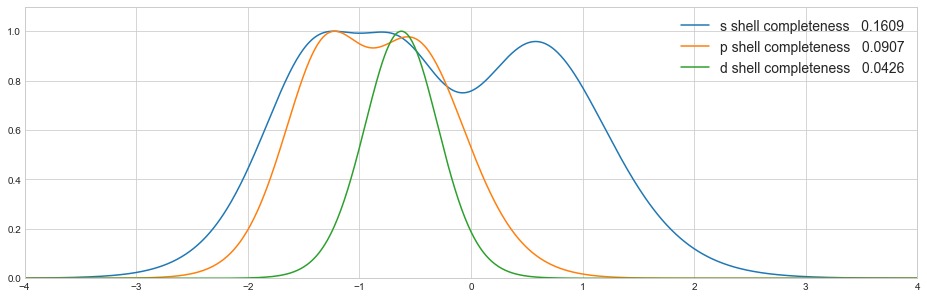

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 5))
for shell in df.columns:
    c = df[shell].sum()/df[shell].size
    plt.plot(np.log10(zetas), df[shell], label='{} shell completeness {:8.4f}'.format(shell, c))
plt.legend(loc='best', frameon=False, fontsize='14')
plt.xlim(-4, 4)
plt.ylim(0.0, 1.1)
plt.show()

or separately

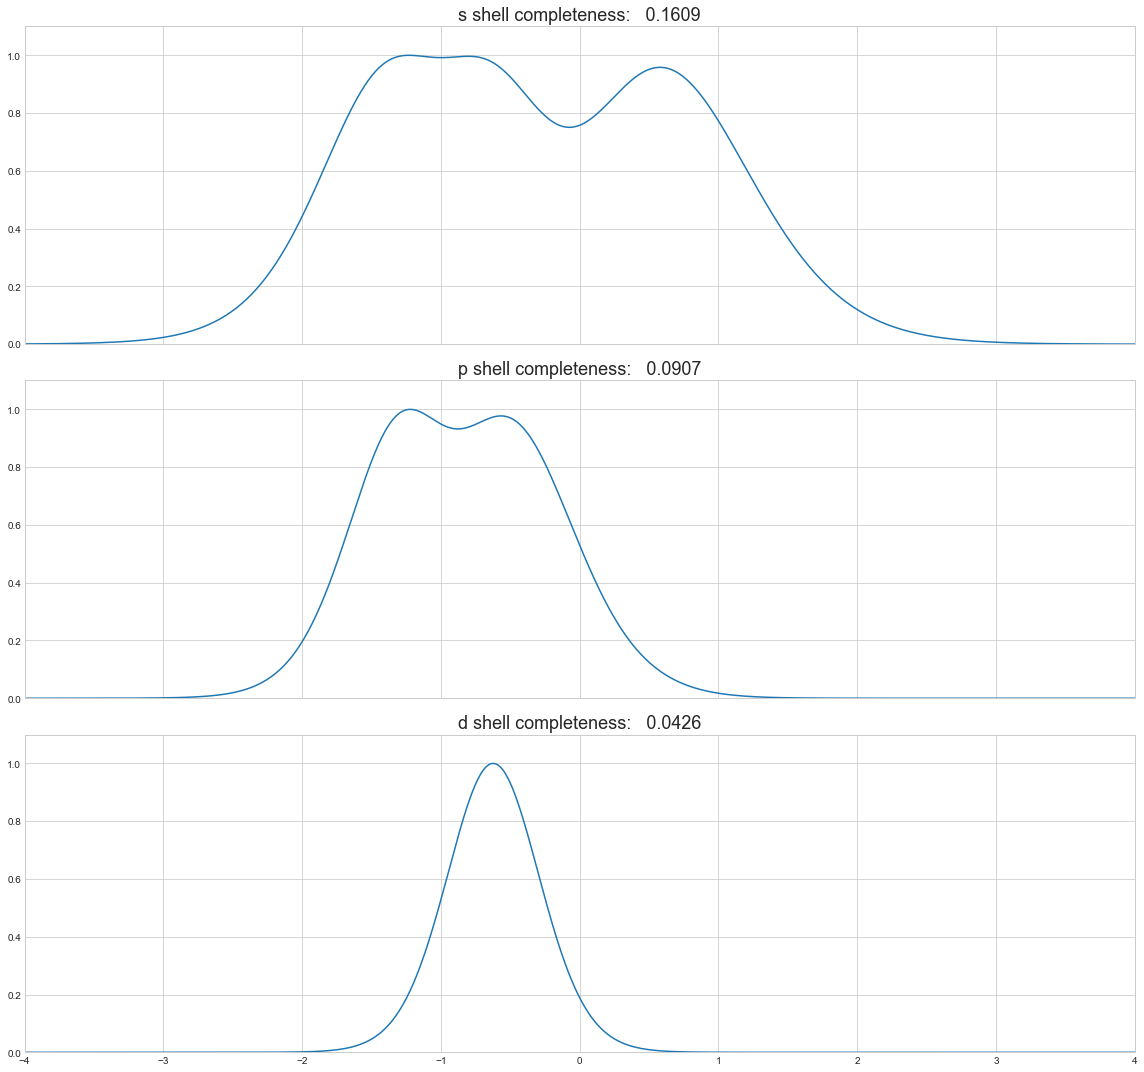

In [67]:
f, axes = plt.subplots(df.shape[1], sharex=True, figsize=(16, 5*df.shape[1]))
for axis, shell in zip(axes, df.columns):
    axis.plot(np.log10(zetas), df[shell])
    axis.set_title('{} shell completeness: {:8.4f}'.format(shell, df[shell].sum()/df[shell].size), fontsize=18)
    axis.set_ylim(0.0, 1.1)
plt.xlim(-4, 4)
plt.tight_layout()

In [68]:
%version_information chemtools, mendeleev, scipy, numpy, matplotlib, seaborn

Software versions
Python 3.6.3 64bit [GCC 7.2.0]
IPython 6.2.1
OS Linux 4.9.0 4 amd64 x86_64 with debian 9.1
chemtools 0.8.4
mendeleev 0.4.0
scipy 1.0.0
numpy 1.13.3
matplotlib 2.1.0
seaborn 0.8.1
Mon Nov 27 14:11:32 2017 CET